In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import sys
sys.path.append('..')
import myd2l

In [2]:
class LSTMNet(nn.Module):
    def __init__(self, vocab_size, num_hiddens, num_layers=1):
        super().__init__()
        self.num_layers = num_layers
        self.num_directions = 1
        self.vocab_size = vocab_size
        self.num_hiddens = num_hiddens
        self.lstm = nn.LSTM(vocab_size, num_hiddens)
        self.fc = nn.Linear(num_hiddens, vocab_size)
    
    def forward(self, X, state):
        X = F.one_hot(X.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.lstm(X, state)
        Y = self.fc(Y).reshape(-1, self.vocab_size)
        
        return Y, state
    
    def begin_state(self, batch_size, device):
        return (
            torch.zeros((self.num_layers * self.num_directions, batch_size, self.num_hiddens), dtype=torch.float32, device=device), 
            torch.zeros((self.num_layers * self.num_directions, batch_size, self.num_hiddens), dtype=torch.float32, device=device))

epoch 10, perplexity 17.2
time traveller                                                  
epoch 20, perplexity 16.3
time traveller  t t t t t t t t t t t t t t t t t t t t t t t t 
epoch 30, perplexity 14.0
time traveller the the the the the the the the the the the the t
epoch 40, perplexity 12.1
time traveller the the the the the the the the the the the the t
epoch 50, perplexity 11.1
time travellere the the the the the the the the the the the the 
epoch 60, perplexity 10.5
time travellere the the the the the the the the the the the the 
epoch 70, perplexity 9.9
time traveller an the the the the the the the the the the the th
epoch 80, perplexity 9.5
time travellerererererererererererererererererererererererererer
epoch 90, perplexity 9.1
time traveller the the the the the the the the the the the the t
epoch 100, perplexity 8.6
time traveller the the the the the the the the the the the the t
epoch 110, perplexity 8.2
time travellereation the the the the the the the the the the the
ep

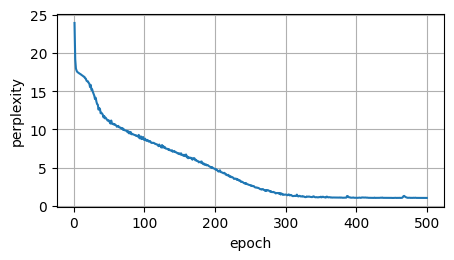

perplexity 1.1, 276109.3 examples/sec on cuda
time traveller for so it will be convenient to speak of himwas e
traveller with a slight accession ofcheerfulness really thi


In [ ]:
batch_size, num_steps = 32, 35
train_iter, vocab = myd2l.load_data_time_machine(batch_size, num_steps)

num_hidden = 256
net = LSTMNet(len(vocab), 256)

num_epochs, lr = 500, 1
device = torch.device('cuda')
myd2l.train_lm(net, train_iter, vocab, lr, num_epochs, device)